<a href="https://colab.research.google.com/github/Sercan1111/TimeSeriesForecastLSTMARIMA/blob/main/3CryptoLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import os
import pandas as pd

def read_sql_files(folder_path, start_date, end_date):
    # Tüm dosyaları listele
    files = os.listdir(folder_path)
    sql_files = [file for file in files if file.endswith('.sql')]

    # Belirtilen tarih aralığındaki dosyaları filtrele
    filtered_files = [file for file in sql_files if start_date <= file.split('_')[3] <= end_date]

    if not filtered_files:
        print(f"No files found in the date range {start_date} to {end_date} in folder {folder_path}")
        return pd.DataFrame(columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

    # SQL dosyalarını parça parça oku ve DataFrame oluştur
    chunk_size = 10000  # Her seferde okunacak satır sayısı
    data_frames = []
    for file in filtered_files:
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            rows = []
            for line in f:
                if 'INSERT INTO' in line:
                    values_str = line.split('VALUES')[1].strip().strip('();')
                    values = values_str.split(',')
                    timestamp = int(values[0])
                    open_price = float(values[1])
                    high_price = float(values[2])
                    low_price = float(values[3])
                    close_price = float(values[4])
                    volume = float(values[5])
                    rows.append([timestamp, open_price, high_price, low_price, close_price, volume])
                    if len(rows) >= chunk_size:
                        df_chunk = pd.DataFrame(rows, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                        data_frames.append(df_chunk)
                        rows = []  # Satırları sıfırla
            if rows:
                df_chunk = pd.DataFrame(rows, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                data_frames.append(df_chunk)

    # Tüm DataFrame'leri birleştir
    merged_df = pd.concat(data_frames, ignore_index=True)
    return merged_df

# Klasörleri ve tarih aralığını belirtin
crypto_folders = ['algo','btc','dot']
base_path = '/content/drive/MyDrive/Colab_Notebooks/prices/'
start_date = '2021-06-01'
end_date = '2023-06-01'

# Tüm kripto paralar için verileri okuyun
crypto_data = {}
for folder in crypto_folders:
    folder_path = os.path.join(base_path, folder)
    df = read_sql_files(folder_path, start_date, end_date)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    df.rename(columns={
        'open': f'{folder}_open',
        'high': f'{folder}_high',
        'low': f'{folder}_low',
        'close': f'{folder}_close',
        'volume': f'{folder}_volume'
    }, inplace=True)
    crypto_data[folder] = df

# BTC timestamp'ini ana timestamp olarak kullanarak verileri birleştirme
btc_df = crypto_data['btc']
merged_data = btc_df.copy()

for folder, df in crypto_data.items():
    if folder != 'btc':
        merged_data = merged_data.join(df, how='left')

# Sonuçları kontrol etme
print(merged_data.head())
print(merged_data.tail())

# Verilerin genel görünümünü kontrol etme
print("\nMerged data head:")
print(merged_data.head())

print("\nMerged data tail:")
print(merged_data.tail())


                     btc_open  btc_high   btc_low     btc_close  btc_volume  \
timestamp                                                                     
2021-06-01 00:00:00  37276.24  37279.89  37126.24  37153.710000   36.415537   
2021-06-01 00:01:00  37157.00  37264.90  37130.78  37190.710000   53.702711   
2021-06-01 00:02:00  37210.00  37491.02  37200.00  37443.443904   62.426950   
2021-06-01 00:03:00  37474.54  37664.81  37429.90  37598.000000  106.395941   
2021-06-01 00:04:00  37623.98  37640.43  37512.27  37623.100000   45.029422   

                     algo_open  algo_high  algo_low  algo_close   algo_volume  \
timestamp                                                                       
2021-06-01 00:00:00     0.9357     0.9362    0.9295      0.9295  10302.000000   
2021-06-01 00:01:00     0.9293     0.9401    0.9293      0.9384  10240.000000   
2021-06-01 00:02:00     0.9383     0.9496    0.9383      0.9494  73415.601208   
2021-06-01 00:03:00     0.9485     0.9485

In [50]:
merged_data.head()

,btc_open,btc_high,btc_low,btc_close,btc_volume,algo_open,algo_high,algo_low,algo_close,algo_volume,dot_open,dot_high,dot_low,dot_close,dot_volume
timestamp,,,,,,,,,,,,,,,
2021-06-01 00:00:00,37276.24,37279.89,37126.24,37153.710000,36.415537,0.9357,0.9362,0.9295,0.9295,10302.000000,23.280,23.284,23.225,23.225,3.149197
2021-06-01 00:01:00,37157.00,37264.90,37130.78,37190.710000,53.702711,0.9293,0.9401,0.9293,0.9384,10240.000000,23.143,23.203,23.143,23.203,932.932798
2021-06-01 00:02:00,37210.00,37491.02,37200.00,37443.443904,62.426950,0.9383,0.9496,0.9383,0.9494,73415.601208,23.222,23.400,23.222,23.400,1083.970055
2021-06-01 00:03:00,37474.54,37664.81,37429.90,37598.000000,106.395941,0.9485,0.9485,0.9420,0.9441,71516.000000,23.392,23.400,23.369,23.400,766.562442
2021-06-01 00:04:00,37623.98,37640.43,37512.27,37623.100000,45.029422,0.9441,0.9468,0.9424,0.9462,24479.000000,23.382,23.382,23.382,23.382,5.341900


In [51]:
# BTC verilerindeki eksik timestamp'leri kontrol etme
def check_missing_timestamps(df, freq='T'):
    full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq)
    missing_timestamps = full_range.difference(df.index)
    return missing_timestamps

# BTC verilerindeki eksik timestamp'leri kontrol etme (dakikalık veri için)
missing_timestamps = check_missing_timestamps(merged_data[['btc_close']])

print(f"Missing timestamps (total {len(missing_timestamps)}):")
print(missing_timestamps)


Missing timestamps (total 0):
DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [52]:
# Check for missing values in the merged data
def check_missing_values(df, crypto_folders):
    missing_info = {}
    for crypto in crypto_folders:
        crypto_close_column = f'{crypto}_close'
        missing_count = df[crypto_close_column].isnull().sum()
        missing_timestamps = df[df[crypto_close_column].isnull()].index
        missing_info[crypto] = {
            'missing_count': missing_count,
            'missing_timestamps': missing_timestamps
        }
    return missing_info

# Get missing values information
missing_info = check_missing_values(merged_data, crypto_folders)

# Print missing values information
for crypto, info in missing_info.items():
    print(f"Crypto: {crypto}")
    print(f"Missing values count: {info['missing_count']}")
    print(f"Missing timestamps: {info['missing_timestamps']}\n")


Crypto: algo
Missing values count: 4436
Missing timestamps: DatetimeIndex(['2021-06-28 05:35:00', '2021-07-09 08:50:00',
               '2021-07-10 08:48:00', '2021-07-10 10:27:00',
               '2021-07-11 08:53:00', '2021-07-11 10:40:00',
               '2021-07-11 12:27:00', '2021-07-13 08:52:00',
               '2021-07-13 10:26:00', '2021-07-18 10:44:00',
               ...
               '2023-07-01 10:57:00', '2023-07-01 11:34:00',
               '2023-07-01 11:36:00', '2023-07-01 11:52:00',
               '2023-07-01 11:53:00', '2023-07-01 11:59:00',
               '2023-07-01 12:19:00', '2023-07-01 15:40:00',
               '2023-07-01 20:48:00', '2023-07-01 22:09:00'],
              dtype='datetime64[ns]', name='timestamp', length=4436, freq=None)

Crypto: btc
Missing values count: 0
Missing timestamps: DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)

Crypto: dot
Missing values count: 19349
Missing timestamps: DatetimeIndex(['2021-06-01 00:17:00', '20

In [53]:
import pandas as pd

# Eksik verileri doldurma fonksiyonu
def fill_missing_values(df, method='linear'):
    if method == 'linear':
        return df.interpolate(method='linear')
    elif method == 'ffill':
        return df.ffill()
    elif method == 'bfill':
        return df.bfill()
    else:
        raise ValueError("Invalid fill method. Use 'linear', 'ffill' or 'bfill'.")

# Çok fazla eksik verisi olan kripto paraları belirleme
threshold = 0.3  # Eksik verilerin oranı (örneğin %50)
total_timestamps = len(merged_data)
to_remove = [crypto for crypto, info in missing_info.items() if info['missing_count'] / total_timestamps > threshold]

# Az eksik verisi olan kripto paraları linear interpolation ile doldurma
for crypto, info in missing_info.items():
    if crypto not in to_remove:
        merged_data[f'{crypto}_close'] = fill_missing_values(merged_data[f'{crypto}_close'], method='linear')

# Çok eksik verisi olan kripto paraları çıkarma
merged_data.drop(columns=[f'{crypto}_close' for crypto in to_remove], inplace=True)

# Sonuçları kontrol etme
print("\nFinal merged data head:")
print(merged_data.head())


print(f"\nRemoved cryptos due to excessive missing values: {to_remove}")



Final merged data head:
                     btc_open  btc_high   btc_low     btc_close  btc_volume  \
timestamp                                                                     
2021-06-01 00:00:00  37276.24  37279.89  37126.24  37153.710000   36.415537   
2021-06-01 00:01:00  37157.00  37264.90  37130.78  37190.710000   53.702711   
2021-06-01 00:02:00  37210.00  37491.02  37200.00  37443.443904   62.426950   
2021-06-01 00:03:00  37474.54  37664.81  37429.90  37598.000000  106.395941   
2021-06-01 00:04:00  37623.98  37640.43  37512.27  37623.100000   45.029422   

                     algo_open  algo_high  algo_low  algo_close   algo_volume  \
timestamp                                                                       
2021-06-01 00:00:00     0.9357     0.9362    0.9295      0.9295  10302.000000   
2021-06-01 00:01:00     0.9293     0.9401    0.9293      0.9384  10240.000000   
2021-06-01 00:02:00     0.9383     0.9496    0.9383      0.9494  73415.601208   
2021-06-01 00:03

In [54]:
import pandas as pd

# İlk ve son tarihleri belirleme
start_date = merged_data.index.min()
end_date = merged_data.index.max()

# Tüm dakikalık timestamp'leri oluşturma (2 yıllık süre)
all_timestamps = pd.date_range(start=start_date, end=end_date, freq='T')

# Orijinal veri setinde olmayan timestamp'leri bulma
missing_timestamps = all_timestamps.difference(merged_data.index)

# Eksik verileri doldurma
for column in merged_data.columns:
    missing_values_count = merged_data[column].isnull().sum()
    total_values_count = len(merged_data)
    missing_ratio = missing_values_count / total_values_count

    if missing_ratio <= 0.3:
        # Linear interpolation ile eksik verileri doldurma
        merged_data[column] = merged_data[column].interpolate(method='linear')
        print(f"Filled missing values for {column} with linear interpolation.")
    else:
        print(f"{column} has too many missing values ({missing_ratio * 100:.2f}%). Consider removing this asset from the dataset.")

# Sonuçları kontrol etme
print("\nFilled data head:")
print(merged_data.head())

print("\nFilled data tail:")
print(merged_data.tail())

# Eğer eksik veriler hala varsa, onları kontrol etme
still_missing = merged_data.isnull().sum()
print("\nStill missing values after interpolation:")
print(still_missing[still_missing > 0])


Filled missing values for btc_open with linear interpolation.
Filled missing values for btc_high with linear interpolation.
Filled missing values for btc_low with linear interpolation.
Filled missing values for btc_close with linear interpolation.
Filled missing values for btc_volume with linear interpolation.
Filled missing values for algo_open with linear interpolation.
Filled missing values for algo_high with linear interpolation.
Filled missing values for algo_low with linear interpolation.
Filled missing values for algo_close with linear interpolation.
Filled missing values for algo_volume with linear interpolation.
Filled missing values for dot_open with linear interpolation.
Filled missing values for dot_high with linear interpolation.
Filled missing values for dot_low with linear interpolation.
Filled missing values for dot_close with linear interpolation.
Filled missing values for dot_volume with linear interpolation.

Filled data head:
                     btc_open  btc_high 

In [55]:
merged_data.head(10)

,btc_open,btc_high,btc_low,btc_close,btc_volume,algo_open,algo_high,algo_low,algo_close,algo_volume,dot_open,dot_high,dot_low,dot_close,dot_volume
timestamp,,,,,,,,,,,,,,,
2021-06-01 00:00:00,37276.24,37279.89,37126.24,37153.710000,36.415537,0.9357,0.9362,0.9295,0.9295,10302.000000,23.280,23.284,23.225,23.225,3.149197
2021-06-01 00:01:00,37157.00,37264.90,37130.78,37190.710000,53.702711,0.9293,0.9401,0.9293,0.9384,10240.000000,23.143,23.203,23.143,23.203,932.932798
2021-06-01 00:02:00,37210.00,37491.02,37200.00,37443.443904,62.426950,0.9383,0.9496,0.9383,0.9494,73415.601208,23.222,23.400,23.222,23.400,1083.970055
2021-06-01 00:03:00,37474.54,37664.81,37429.90,37598.000000,106.395941,0.9485,0.9485,0.9420,0.9441,71516.000000,23.392,23.400,23.369,23.400,766.562442
2021-06-01 00:04:00,37623.98,37640.43,37512.27,37623.100000,45.029422,0.9441,0.9468,0.9424,0.9462,24479.000000,23.382,23.382,23.382,23.382,5.341900
2021-06-01 00:05:00,37647.39,37717.49,37550.72,37649.810000,122.242927,0.9470,0.9512,0.9463,0.9512,41129.601208,23.378,23.378,23.378,23.378,5.346000
2021-06-01 00:06:00,37643.95,37666.56,37540.51,37609.080000,33.491816,0.9512,0.9514,0.9465,0.9484,57051.000000,23.411,23.411,23.411,23.411,106.658000
2021-06-01 00:07:00,37600.18,37602.31,37497.43,37548.430000,16.496468,0.9464,0.9464,0.9403,0.9432,27949.000000,23.358,23.358,23.324,23.324,220.484749
2021-06-01 00:08:00,37548.43,37632.43,37509.35,37617.080000,21.854079,0.9432,0.9457,0.9422,0.9454,5293.000000,23.414,23.437,23.414,23.437,208.829087


In [56]:
def check_column_types(df):
    for column in df.columns:
        unique_types = df[column].map(type).unique()
        if len(unique_types) > 1:
            print(f"Column '{column}' contains multiple data types: {unique_types}")
        else:
            print(f"Column '{column}' contains a single data type: {unique_types[0]}")

# Sütunların veri tiplerini kontrol etme
print("\nVeri tiplerini kontrol etme sonuçları:")
check_column_types(merged_data)


Veri tiplerini kontrol etme sonuçları:
Column 'btc_open' contains a single data type: <class 'float'>
Column 'btc_high' contains a single data type: <class 'float'>
Column 'btc_low' contains a single data type: <class 'float'>
Column 'btc_close' contains a single data type: <class 'float'>
Column 'btc_volume' contains a single data type: <class 'float'>
Column 'algo_open' contains a single data type: <class 'float'>
Column 'algo_high' contains a single data type: <class 'float'>
Column 'algo_low' contains a single data type: <class 'float'>
Column 'algo_close' contains a single data type: <class 'float'>
Column 'algo_volume' contains a single data type: <class 'float'>
Column 'dot_open' contains a single data type: <class 'float'>
Column 'dot_high' contains a single data type: <class 'float'>
Column 'dot_low' contains a single data type: <class 'float'>
Column 'dot_close' contains a single data type: <class 'float'>
Column 'dot_volume' contains a single data type: <class 'float'>


ValueError: num must be an integer with 1 <= num <= 10, not 11

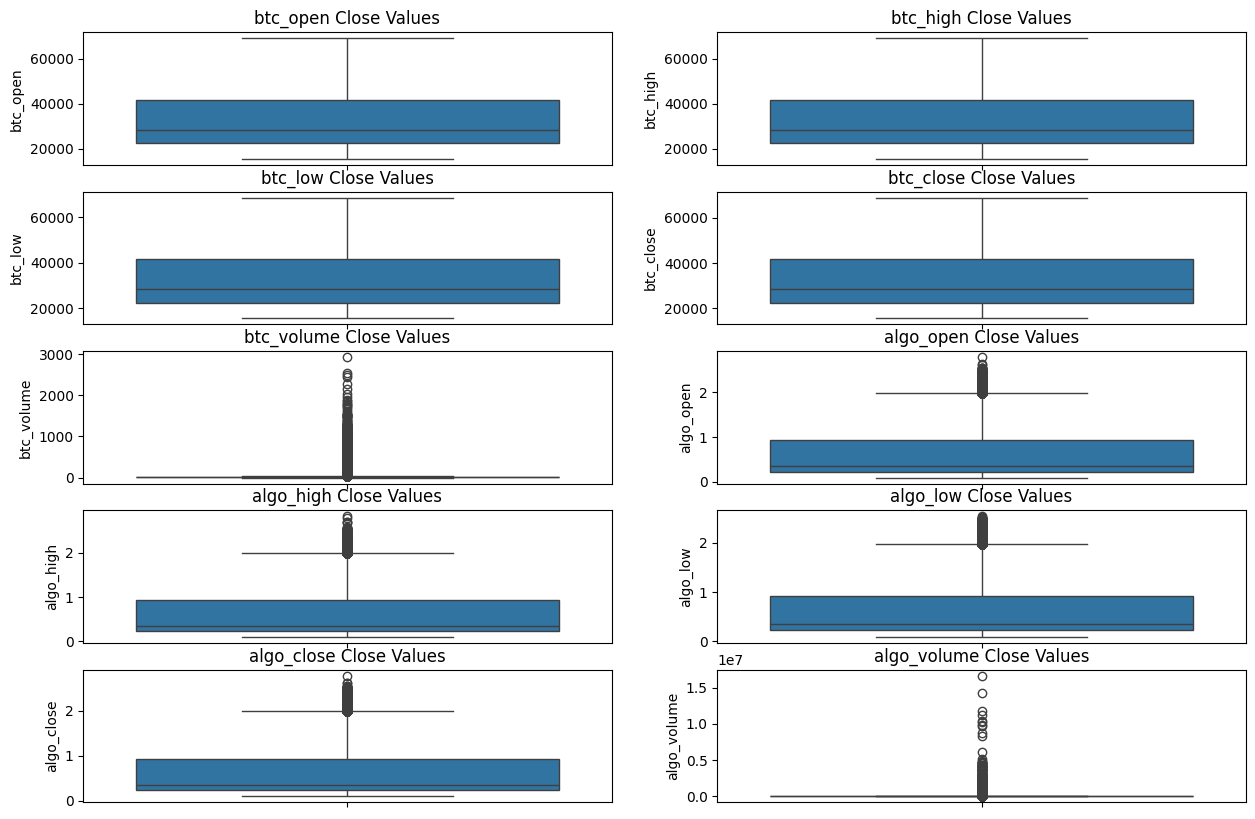

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her bir kripto para birimi için boxplot oluşturma
plt.figure(figsize=(15, 10))

# Tüm kripto paraları tek bir grafikte göstermeye çalışmak yerine, ayrı ayrı grafikte göstermek daha yararlı olabilir.
for i, column in enumerate(merged_data.columns, 1):
    plt.subplot(5, 2, i)  # 5 satır, 2 sütun ve i. grafik
    sns.boxplot(y=merged_data[column])
    plt.title(f'{column} Close Values')

plt.tight_layout()
plt.show()


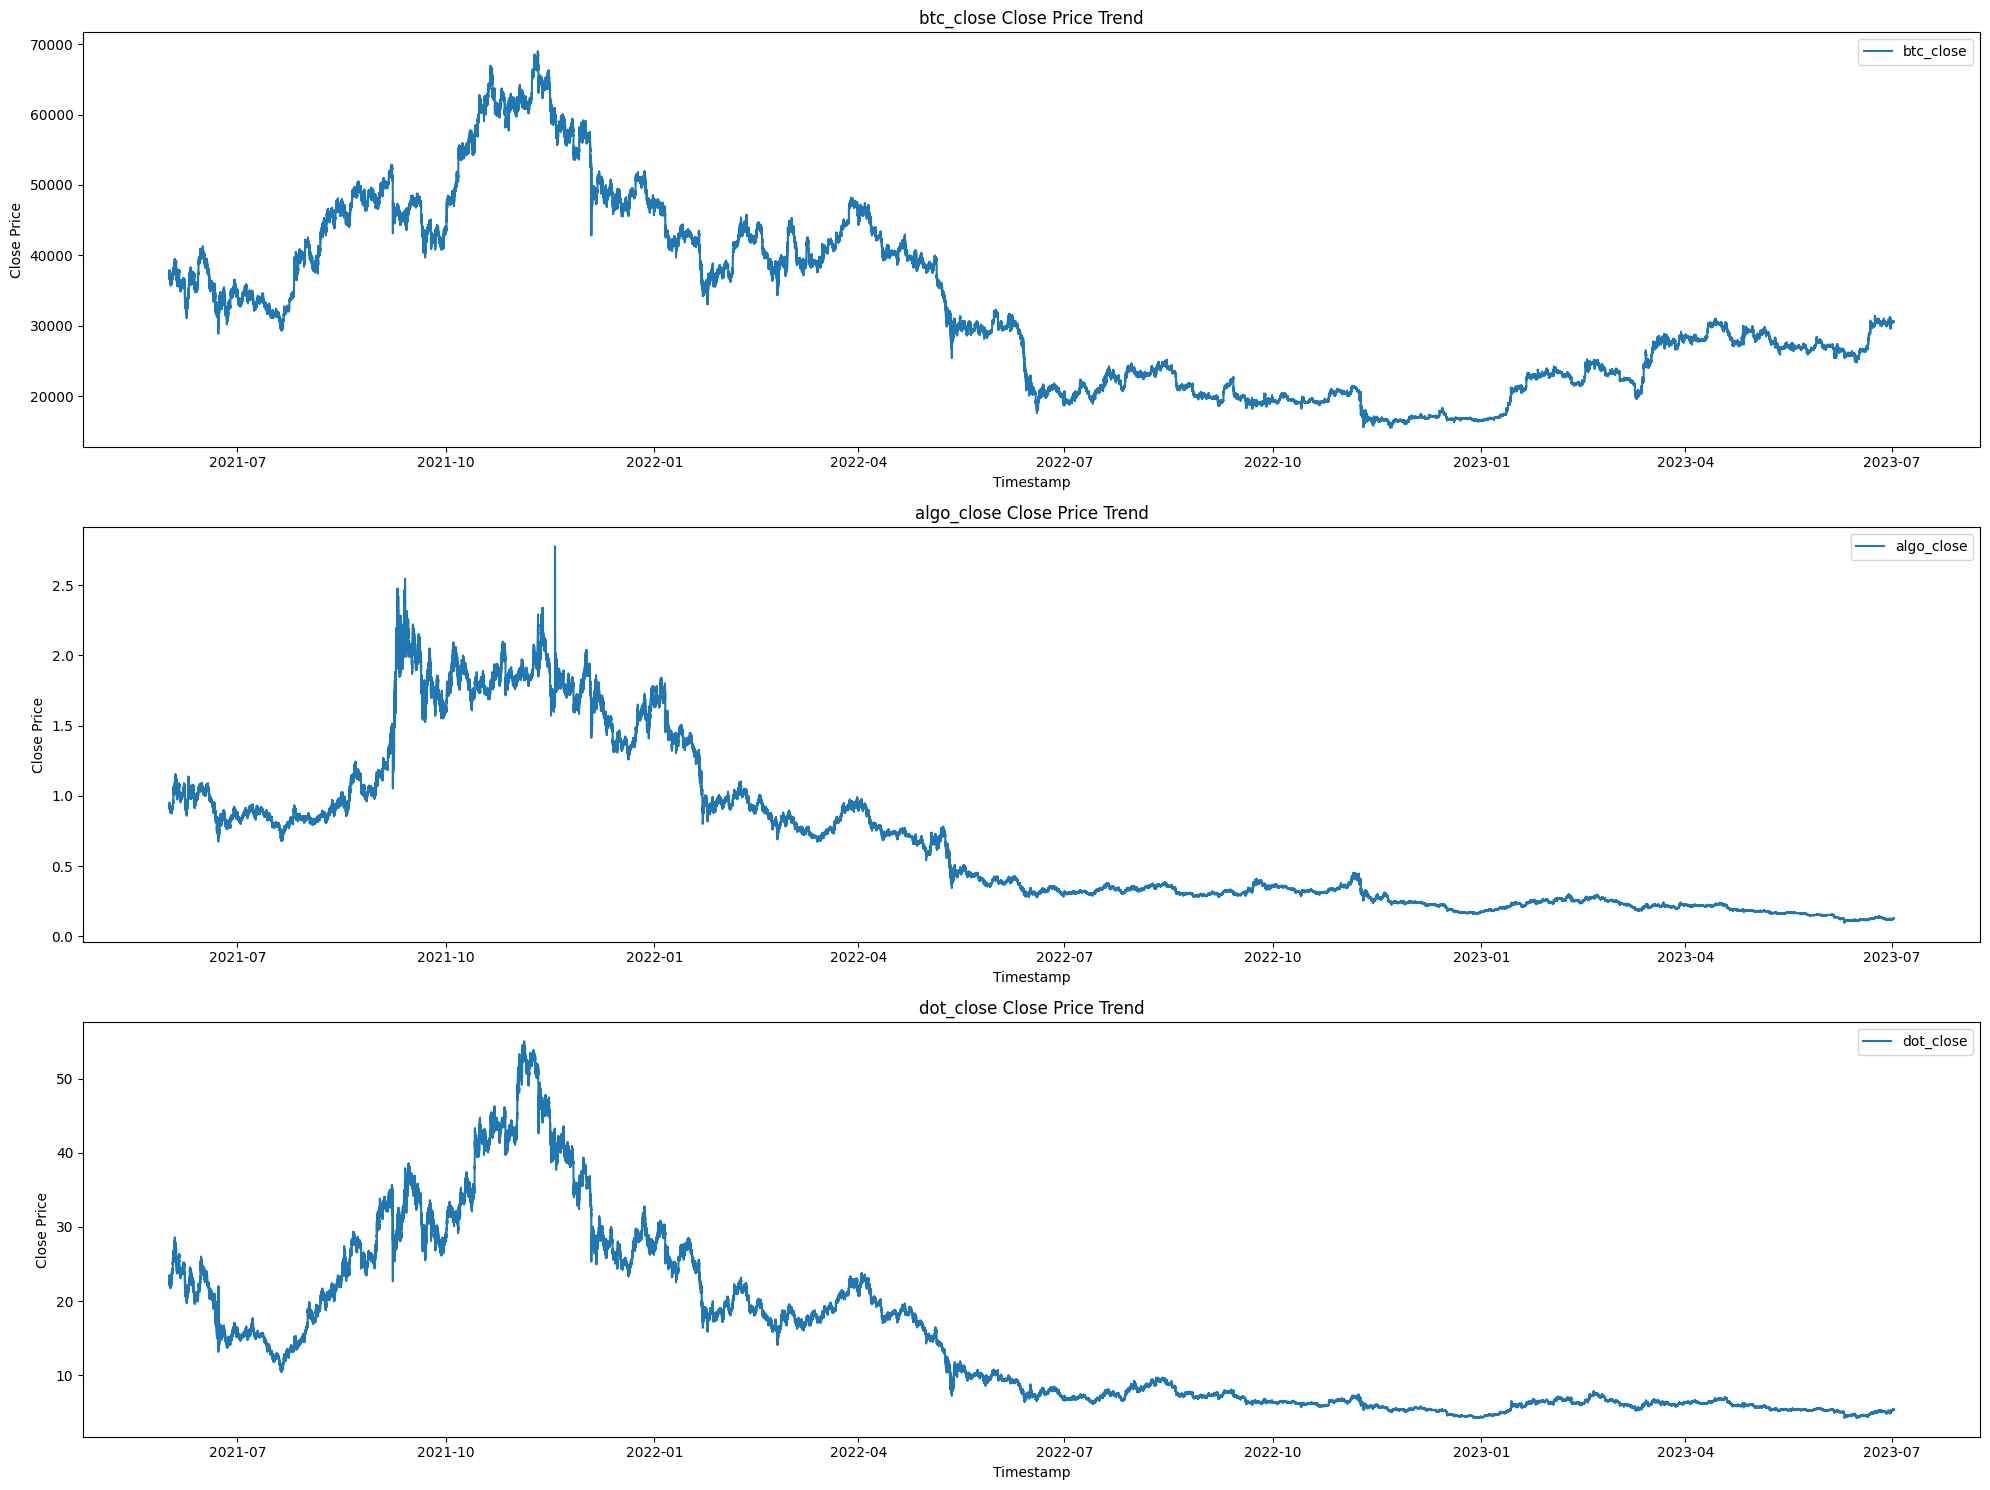

In [57]:
import matplotlib.pyplot as plt

# Sadece close price sütunlarını seçme
close_columns = [col for col in merged_data.columns if 'close' in col]

# Her bir kripto para birimi için line plot oluşturma
plt.figure(figsize=(20, 15))

for i, column in enumerate(close_columns, 1):
    plt.subplot(3, 1, i)  # Her bir close price sütunu için grafik
    plt.plot(merged_data.index, merged_data[column], label=column)
    plt.title(f'{column} Close Price Trend')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price')
    plt.legend()

plt.tight_layout()
plt.show()


In [58]:
# Günlük olarak yeniden örnekleme ve her günün 00:00 değerini alma
daily_data = merged_data.resample('1H').first()

# Sonuçları kontrol etme
print("\nDaily data head:")
print(daily_data.head())




Daily data head:
                     btc_open  btc_high       btc_low  btc_close  btc_volume  \
timestamp                                                                      
2021-06-01 00:00:00  37276.24  37279.89  37126.240000   37153.71   36.415537   
2021-06-01 01:00:00  37836.08  37842.80  37751.580000   37781.81   31.288282   
2021-06-01 02:00:00  37200.52  37302.67  37179.000000   37253.28   23.466094   
2021-06-01 03:00:00  36847.00  36856.82  36769.640000   36800.01    4.152750   
2021-06-01 04:00:00  36707.50  36717.97  36613.702375   36636.06    9.901274   

                     algo_open  algo_high  algo_low  algo_close  algo_volume  \
timestamp                                                                      
2021-06-01 00:00:00     0.9357     0.9362    0.9295      0.9295      10302.0   
2021-06-01 01:00:00     0.9405     0.9405    0.9375      0.9375      12102.0   
2021-06-01 02:00:00     0.9169     0.9215    0.9161      0.9200      28640.0   
2021-06-01 03:00:00  

In [59]:
# Eksik verileri lineer interpolasyon ile doldurma
daily_data = daily_data.interpolate(method='linear')

# Sonuçları kontrol etme
print("\nDaily data after interpolation head:")
print(daily_data.head())



Daily data after interpolation head:
                     btc_open  btc_high       btc_low  btc_close  btc_volume  \
timestamp                                                                      
2021-06-01 00:00:00  37276.24  37279.89  37126.240000   37153.71   36.415537   
2021-06-01 01:00:00  37836.08  37842.80  37751.580000   37781.81   31.288282   
2021-06-01 02:00:00  37200.52  37302.67  37179.000000   37253.28   23.466094   
2021-06-01 03:00:00  36847.00  36856.82  36769.640000   36800.01    4.152750   
2021-06-01 04:00:00  36707.50  36717.97  36613.702375   36636.06    9.901274   

                     algo_open  algo_high  algo_low  algo_close  algo_volume  \
timestamp                                                                      
2021-06-01 00:00:00     0.9357     0.9362    0.9295      0.9295      10302.0   
2021-06-01 01:00:00     0.9405     0.9405    0.9375      0.9375      12102.0   
2021-06-01 02:00:00     0.9169     0.9215    0.9161      0.9200      28640.0   
2

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Her bir kripto para birimi için Min-Max Scaler uygulama
scalers = {}
scaled_data = daily_data.copy()

# Her kripto için Min-Max scaler
for column in daily_data.columns:
    scaler = MinMaxScaler()
    scaled_data[column] = scaler.fit_transform(daily_data[[column]])
    scalers[column] = scaler

# Sonuçları kontrol etme
print("\nScaled data head:")
print(scaled_data.head())
print("\nScaled data tail:")
print(scaled_data.tail())

# Eğitim, doğrulama ve test setlerine ayırma
split_date = daily_data.index[-1] - pd.DateOffset(months=6)
train_val_data = scaled_data[scaled_data.index < split_date]
test_data = scaled_data[scaled_data.index >= split_date]

# Eğitim ve doğrulama verisi
val_split_index = int(len(train_val_data) * (1 - 0.2))  # %20 validation split
train_data = train_val_data[:val_split_index]
val_data = train_val_data[val_split_index:]

# Sonuçları kontrol etme
print("\nTraining data head:")
print(train_data.head())
print("\nValidation data head:")
print(val_data.head())
print("\nTest data head:")
print(test_data.head())

# Verilerin boyutlarını kontrol etme
print("\nTrain data shape:", train_data.shape)
print("Validation data shape:", val_data.shape)
print("Test data shape:", test_data.shape)



Scaled data head:
                     btc_open  btc_high   btc_low  btc_close  btc_volume  \
timestamp                                                                  
2021-06-01 00:00:00  0.408373  0.408173  0.406344   0.406460    0.020916   
2021-06-01 01:00:00  0.418935  0.418791  0.418150   0.418316    0.017970   
2021-06-01 02:00:00  0.406944  0.408603  0.407340   0.408340    0.013476   
2021-06-01 03:00:00  0.400275  0.400193  0.399611   0.399785    0.002380   
2021-06-01 04:00:00  0.397643  0.397574  0.396667   0.396690    0.005683   

                     algo_open  algo_high  algo_low  algo_close  algo_volume  \
timestamp                                                                      
2021-06-01 00:00:00   0.359025   0.358931  0.359464    0.357402     0.004245   
2021-06-01 01:00:00   0.361088   0.360778  0.362931    0.360850     0.004986   
2021-06-01 02:00:00   0.350944   0.352618  0.353657    0.353306     0.011801   
2021-06-01 03:00:00   0.350686   0.350427  0.353

In [61]:
# Target değerlerinizi seçin
target_columns = ['btc_close', 'algo_close', 'dot_close']
feature_columns = [col for col in daily_data.columns if col not in target_columns]

# Feature ve target'ları ayırma
scaled_features = scaled_data[feature_columns]
scaled_targets = scaled_data[target_columns]

# Eğitim, doğrulama ve test setlerine ayırma
split_date = daily_data.index[-1] - pd.DateOffset(months=6)
train_val_features = scaled_features[scaled_features.index < split_date]
test_features = scaled_features[scaled_features.index >= split_date]

train_val_targets = scaled_targets[scaled_targets.index < split_date]
test_targets = scaled_targets[scaled_targets.index >= split_date]

# Eğitim ve doğrulama verisi
val_split_index = int(len(train_val_features) * (1 - 0.2))  # %20 validation split
train_features = train_val_features[:val_split_index]
val_features = train_val_features[val_split_index:]

train_targets = train_val_targets[:val_split_index]
val_targets = train_val_targets[val_split_index:]

# Sonuçları kontrol etme
print("\nTraining feature head:")
print(train_features.head())
print("\nValidation feature head:")
print(val_features.head())
print("\nTest feature head:")
print(test_features.head())

# Verilerin boyutlarını kontrol etme
print("\nTrain features shape:", train_features.shape)
print("Validation features shape:", val_features.shape)
print("Test features shape:", test_features.shape)

print("\nTrain targets shape:", train_targets.shape)
print("Validation targets shape:", val_targets.shape)
print("Test targets shape:", test_targets.shape)



Training feature head:
                     btc_open  btc_high   btc_low  btc_volume  algo_open  \
timestamp                                                                  
2021-06-01 00:00:00  0.408373  0.408173  0.406344    0.020916   0.359025   
2021-06-01 01:00:00  0.418935  0.418791  0.418150    0.017970   0.361088   
2021-06-01 02:00:00  0.406944  0.408603  0.407340    0.013476   0.350944   
2021-06-01 03:00:00  0.400275  0.400193  0.399611    0.002380   0.350686   
2021-06-01 04:00:00  0.397643  0.397574  0.396667    0.005683   0.348106   

                     algo_high  algo_low  algo_volume  dot_open  dot_high  \
timestamp                                                                   
2021-06-01 00:00:00   0.358931  0.359464     0.004245  0.374493  0.374255   
2021-06-01 01:00:00   0.360778  0.362931     0.004986  0.372270  0.371955   
2021-06-01 02:00:00   0.352618  0.353657     0.011801  0.359344  0.360023   
2021-06-01 03:00:00   0.350427  0.353181     0.001939  0.3

In [62]:
test_data.tail(10)

,btc_open,btc_high,btc_low,btc_close,btc_volume,algo_open,algo_high,algo_low,algo_close,algo_volume,dot_open,dot_high,dot_low,dot_close,dot_volume
timestamp,,,,,,,,,,,,,,,
2023-07-01 14:00:00,0.281756,0.281658,0.282280,0.281941,0.001271,0.009758,0.009750,0.009902,0.009678,0.002289,0.021741,0.021752,0.021783,0.021770,0.000644
2023-07-01 15:00:00,0.282605,0.282874,0.283092,0.282980,0.004938,0.010059,0.010050,0.010314,0.010130,0.043359,0.020796,0.020834,0.020874,0.020864,0.002362
2023-07-01 16:00:00,0.282052,0.282101,0.282470,0.282398,0.002366,0.010059,0.010050,0.010357,0.010130,0.000090,0.020619,0.020602,0.020558,0.020529,0.001482
2023-07-01 17:00:00,0.282011,0.282176,0.282388,0.282085,0.002570,0.009844,0.009836,0.010010,0.009828,0.007823,0.020275,0.020264,0.020203,0.020135,0.001618
2023-07-01 18:00:00,0.282101,0.282195,0.282673,0.282511,0.006845,0.009500,0.009578,0.009794,0.009613,0.000270,0.019858,0.019841,0.019887,0.019820,0.000257
2023-07-01 19:00:00,0.282705,0.283138,0.283341,0.283156,0.013658,0.010274,0.010394,0.010530,0.010303,0.030695,0.020777,0.020865,0.020855,0.020805,0.003828
2023-07-01 20:00:00,0.282631,0.282912,0.283343,0.283043,0.001960,0.010231,0.010222,0.010444,0.010303,0.006205,0.021467,0.021530,0.021526,0.021455,0.000484
2023-07-01 21:00:00,0.282418,0.282178,0.282885,0.282582,0.001211,0.010188,0.010308,0.010487,0.010346,0.003730,0.021839,0.022063,0.021921,0.021849,0.016691
2023-07-01 22:00:00,0.282219,0.282384,0.282923,0.282604,0.003055,0.010403,0.010394,0.010660,0.010432,0.000476,0.021524,0.021697,0.021645,0.021671,0.002757


In [63]:
# Zaman adımı (geçmiş periyod)
time_step = 60

# Eğitim, doğrulama ve test setlerini LSTM için uygun hale getirme
X_train, y_train = create_dataset(train_features.values, time_step)
X_validation, y_validation = create_dataset(val_features.values, time_step)
X_test, y_test = create_dataset(test_features.values, time_step)

# Hedef değerleri (close prices) için LSTM veri setleri oluşturma
_, y_train = create_dataset(train_targets.values, time_step)
_, y_validation = create_dataset(val_targets.values, time_step)
_, y_test = create_dataset(test_targets.values, time_step)

# LSTM modeline uygun veri setlerinin boyutlarını kontrol etme
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_validation shape: {X_validation.shape}")
print(f"y_validation shape: {y_validation.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (11074, 60, 12)
y_train shape: (11074, 3)
X_validation shape: (2723, 60, 12)
y_validation shape: (2723, 3)
X_test shape: (4284, 60, 12)
y_test shape: (4284, 3)


In [ ]:
!pip install scikit-learn
!pip install tensorflow
!pip install keras-tuner --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 3.1 MB/s eta 0:00:00


ImportError: cannot import name 'xLSTM' from 'xlstm' (/usr/local/lib/python3.10/dist-packages/xlstm/__init__.py)

In [16]:
!pip install scikeras
!pip install tensorflow
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 98.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.6 MB/s eta 0:00:00


In [23]:
!pip install --upgrade scikit-learn scikeras tensorflow
!pip install keras-tuner --upgrade
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.0.2
!pip install scikeras --upgrade


Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Successfully uninstalled scikit-learn-1.5.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 51.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
scikeras 0.13.0 requires scikit-learn>=1.4.2, but you have scikit-learn 1.0.2 which is incompatible.


  Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached scikit_learn-1.5.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [45]:
import numpy as np
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping

# LSTM model tanımlama fonksiyonu
def create_lstm_model(num_units=50, dropout_rate=0.2, learning_rate=0.001, num_layers=2):
    model = Sequential()

    for i in range(num_layers):
        if i == 0:
            model.add(LSTM(units=num_units, return_sequences=(num_layers > 1), input_shape=(X_train.shape[1], X_train.shape[2])))
        elif i == num_layers - 1:
            model.add(LSTM(units=num_units, return_sequences=False))
        else:
            model.add(LSTM(units=num_units, return_sequences=True))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=3))  # 1 output (close price prediction)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Hiperparametre arama alanı
param_dist = {
    'model__num_units': [50, 100, 150],
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64, 128],
    'epochs': [20, 30,50],
    'model__learning_rate': [0.001, 0.01],
    'model__num_layers': [1, 2, 3]
}

# EarlyStopping callback'i tanımlama
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Model eğitimi ve optimizasyonu
model = KerasRegressor(model=create_lstm_model, verbose=1)

# RandomizedSearchCV ile en iyi modeli bulma
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, verbose=2, random_state=42)
random_search_result = random_search.fit(X_train, y_train, validation_data=(X_validation, y_validation), callbacks=[early_stopping])

# En iyi parametreleri yazdırma
print("Best parameters found: ", random_search_result.best_params_)

# En iyi modeli kullanarak tahmin yapma
best_model = random_search_result.best_estimator_.model


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0224 - val_loss: 2.7009e-05
Epoch 2/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0048 - val_loss: 6.9054e-04
Epoch 3/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0042 - val_loss: 1.1196e-04
Epoch 4/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0030 - val_loss: 2.0166e-05
Epoch 5/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0028 - val_loss: 1.6174e-05
Epoch 6/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0018 - val_loss: 9.6981e-05
Epoch 7/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0017 - val_loss: 1.5790e-04
Epoch 8/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0018 - val_loss: 2.6455e-05
Epoch 9/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0015 - val_loss: 6.6743e-04
Epoch 10/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0016 - val_loss: 4.9574e-04
Epoch 11/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0015 - val_loss: 4.5509e-

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0140 - val_loss: 1.8627e-05
Epoch 2/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0023 - val_loss: 3.5070e-05
Epoch 3/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0016 - val_loss: 5.5194e-05
Epoch 4/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0011 - val_loss: 8.5282e-05
Epoch 5/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 6/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0010 - val_loss: 1.6645e-05
Epoch 7/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 7.7650e-04 - val_loss: 2.3257e-05
Epoch 8/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 7.3009e-04 - val_loss: 2.6680e-05
Epoch 9/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 6.7740e-04 - val_loss: 4.6300e-05
Epoch 10/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 6.5787e-04 - val_loss: 2.3633e-04
Epoch 11/30
279/279 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 6.5481e-04 - va

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
126/279 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0366

KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0301 - val_loss: 5.2472e-05
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0063 - val_loss: 4.5409e-05
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0048 - val_loss: 5.1565e-05
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0042 - val_loss: 6.2673e-05
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0036 - val_loss: 1.0072e-04
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0032 - val_loss: 3.2096e-05
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028 - val_loss: 2.8981e-05
Epoch 8/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0025 - val_loss: 1.3926e-04
Epoch 9/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0023 - val_loss: 3.8872e-05
Epoch 10/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0022 - val_loss: 5.3625e-05
Epoch 11/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - val_loss: 2.9441e-04
Epoch 12/50
87/87 ━

Model saved to 3_Crypto_LSTM_1xH.h5


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_93 (LSTM)                       │ (None, 60, 75)              │          26,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 60, 75)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_94 (LSTM)                       │ (None, 60, 75)              │          45,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_94 (Dropout)                 │ (None, 60, 75)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_95 (LSTM)                       │ (None, 75)                  │          45,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_95 (Dropout)                 │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 351,686 (1.34 MB)

 Trainable params: 117,228 (457.92 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 234,458 (915.86 KB)

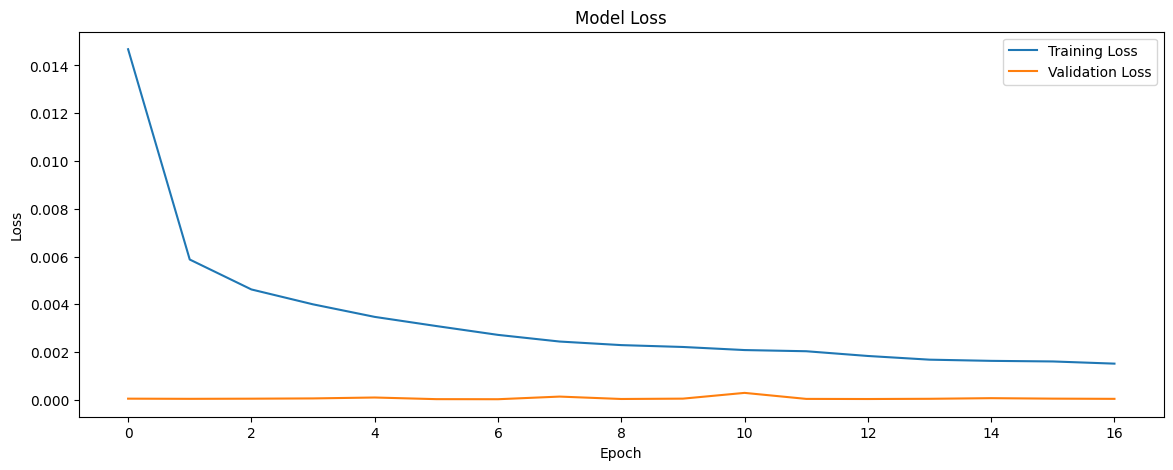

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
347/347 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Train CSV saved as train_1h.csv
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation CSV saved as val_1h.csv
Test CSV saved as test_1h.csv


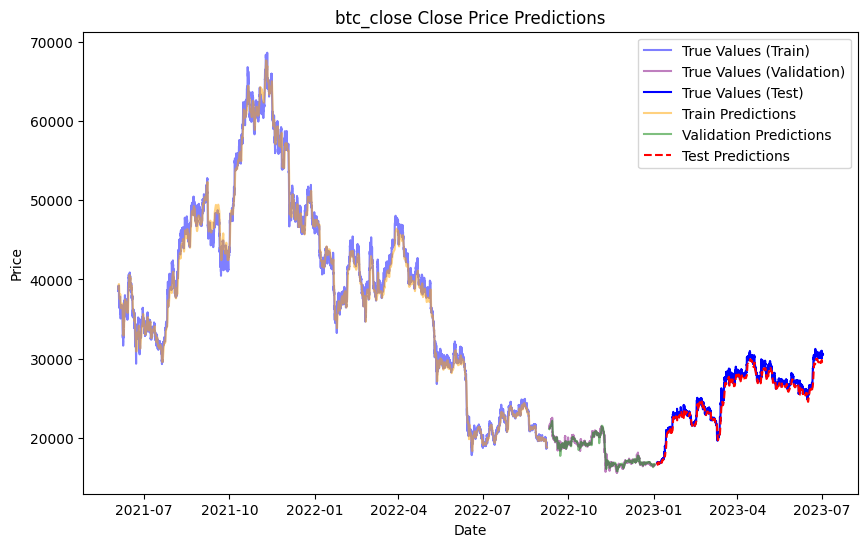

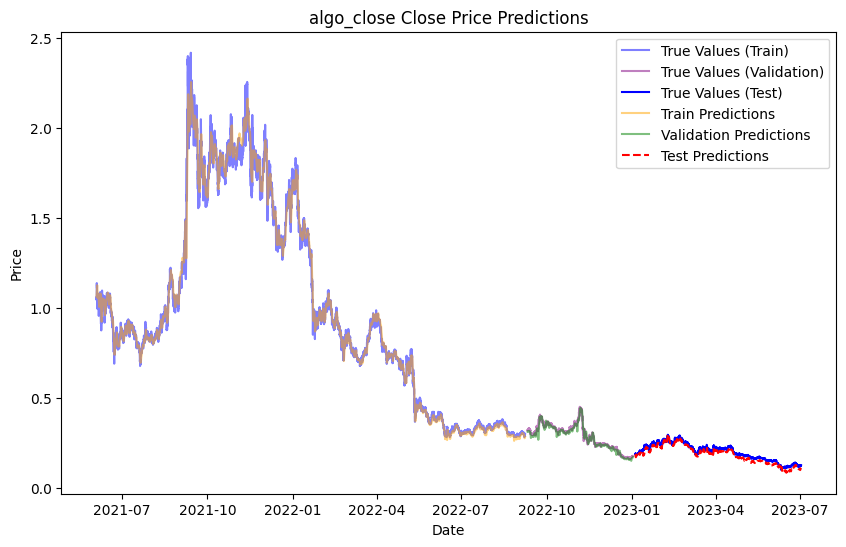

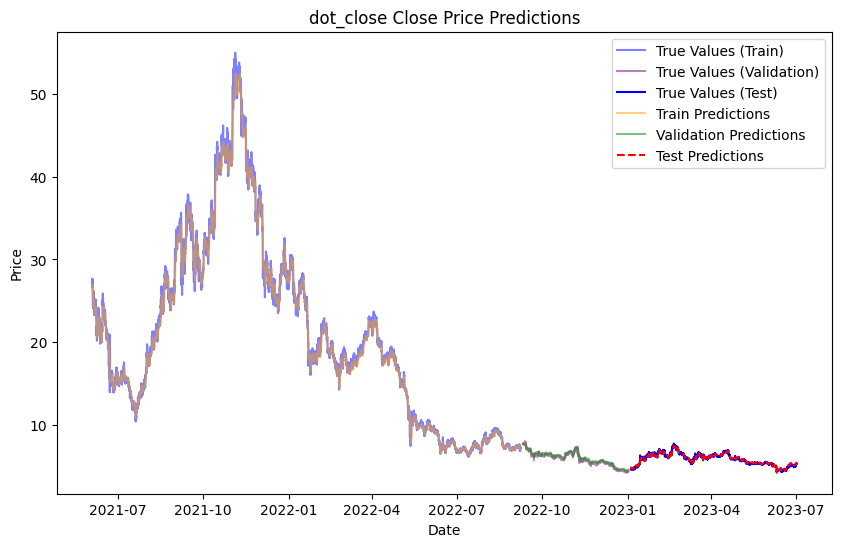

MAPE for btc_close: 0.01836261862626932
RMSE for btc_close: 617.4375331924313
R² for btc_close: 0.9667488398303721
MAPE for algo_close: 0.08567244739060131
RMSE for algo_close: 0.01687354703571536
R² for algo_close: 0.868331517287014
MAPE for dot_close: 0.018490441723340505
RMSE for dot_close: 0.14457694341868207
R² for dot_close: 0.9582742643622145

Check if inverse transform is consistent
First 5 scaled y_test values:
[[0.02303455 0.03832227 0.00776232]
 [0.02290979 0.03810673 0.00762441]
 [0.02235733 0.03750323 0.00768352]
 [0.02273161 0.03806363 0.00795934]
 [0.02224389 0.03750323 0.00752591]]
First 5 rescaled y_test values:
                     btc_close  algo_close  dot_close
timestamp                                            
2023-01-04 12:00:00   16839.31      0.1893      4.639
2023-01-04 13:00:00   16832.70      0.1888      4.632
2023-01-04 14:00:00   16803.43      0.1874      4.635
2023-01-04 15:00:00   16823.26      0.1887      4.649
2023-01-04 16:00:00   16797.42      0.1

In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# En iyi hiperparametrelerle modeli oluşturma
best_params = {
    'batch_size': 128,
    'epochs': 50,
    'model__dropout_rate': 0.4,
    'model__learning_rate': 0.001,
    'model__num_layers': 3,
    'model__num_units': 75
}

def create_best_model():
    optimizer = Adam(learning_rate=best_params['model__learning_rate'])
    model = Sequential()
    for i in range(best_params['model__num_layers']):
        if i == best_params['model__num_layers'] - 1:
            model.add(LSTM(units=best_params['model__num_units'], return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
        else:
            model.add(LSTM(units=best_params['model__num_units'], return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(rate=best_params['model__dropout_rate']))
    model.add(Dense(units=3))  # 3 output (her bir kripto para için close price)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# EarlyStopping callback'i tanımlama
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modeli oluşturma ve eğitme
best_model = create_best_model()
history = best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'],
                         validation_data=(X_validation, y_validation), callbacks=[early_stopping], verbose=1)

# Modeli kaydetme
model_save_path = "3_Crypto_LSTM_1xH.h5"
best_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Modelin özetini yazdırma
best_model.summary()

# Eğitim ve doğrulama kayıplarını görselleştirme
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Test setindeki tahminleri yapma
y_pred_scaled = best_model.predict(X_test)

# Hedef sütunları belirleme
target_columns = ['btc_close', 'algo_close', 'dot_close']

# Gerçek değerlerin yeniden ölçeklendirilmesi (train, val, test setleri için)
y_train_rescaled = pd.DataFrame(index=train_data.index[time_step+1:], columns=target_columns)
y_val_rescaled = pd.DataFrame(index=val_data.index[time_step+1:], columns=target_columns)
y_test_rescaled = pd.DataFrame(index=test_data.index[time_step+1:], columns=target_columns)
y_pred_rescaled = pd.DataFrame(index=test_data.index[time_step+1:], columns=target_columns)

for i, column in enumerate(target_columns):
    y_train_rescaled[column] = scalers[column].inverse_transform(y_train[:, i].reshape(-1, 1)).flatten()
    y_val_rescaled[column] = scalers[column].inverse_transform(y_validation[:, i].reshape(-1, 1)).flatten()
    y_test_rescaled[column] = scalers[column].inverse_transform(y_test[:, i].reshape(-1, 1)).flatten()
    y_pred_rescaled[column] = scalers[column].inverse_transform(y_pred_scaled[:, i].reshape(-1, 1)).flatten()

# CSV dosyalarını kaydetme (train, validation, test setleri için)
train_df = pd.DataFrame(index=train_data.index[time_step+1:])
train_df['Actual_btc'] = y_train_rescaled['btc_close']
train_df['Predicted_btc'] = scalers['btc_close'].inverse_transform(best_model.predict(X_train)[:, 0].reshape(-1, 1)).flatten()
train_df['Actual_algo'] = y_train_rescaled['algo_close']
train_df['Predicted_algo'] = scalers['algo_close'].inverse_transform(best_model.predict(X_train)[:, 1].reshape(-1, 1)).flatten()
train_df['Actual_dot'] = y_train_rescaled['dot_close']
train_df['Predicted_dot'] = scalers['dot_close'].inverse_transform(best_model.predict(X_train)[:, 2].reshape(-1, 1)).flatten()
train_df.to_csv("train_1h.csv", index=True)
print("Train CSV saved as train_1h.csv")

val_df = pd.DataFrame(index=val_data.index[time_step+1:])
val_df['Actual_btc'] = y_val_rescaled['btc_close']
val_df['Predicted_btc'] = scalers['btc_close'].inverse_transform(best_model.predict(X_validation)[:, 0].reshape(-1, 1)).flatten()
val_df['Actual_algo'] = y_val_rescaled['algo_close']
val_df['Predicted_algo'] = scalers['algo_close'].inverse_transform(best_model.predict(X_validation)[:, 1].reshape(-1, 1)).flatten()
val_df['Actual_dot'] = y_val_rescaled['dot_close']
val_df['Predicted_dot'] = scalers['dot_close'].inverse_transform(best_model.predict(X_validation)[:, 2].reshape(-1, 1)).flatten()
val_df.to_csv("val_1h.csv", index=True)
print("Validation CSV saved as val_1h.csv")

test_df = pd.DataFrame(index=test_data.index[time_step+1:])
test_df['Actual_btc'] = y_test_rescaled['btc_close']
test_df['Predicted_btc'] = y_pred_rescaled['btc_close']
test_df['Actual_algo'] = y_test_rescaled['algo_close']
test_df['Predicted_algo'] = y_pred_rescaled['algo_close']
test_df['Actual_dot'] = y_test_rescaled['dot_close']
test_df['Predicted_dot'] = y_pred_rescaled['dot_close']
test_df.to_csv("test_1h.csv", index=True)
print("Test CSV saved as test_1h.csv")

# Tahminleri ve gerçek değerleri görselleştirme (train, val, test için her kripto parayı ayrı ayrı çizme)
for i, column in enumerate(target_columns):
    plt.figure(figsize=(10, 6))

    # Gerçek değerleri gösterme (train, validation ve test setleri)
    plt.plot(y_train_rescaled.index, y_train_rescaled[column], label='True Values (Train)', color='blue', alpha=0.5)
    plt.plot(y_val_rescaled.index, y_val_rescaled[column], label='True Values (Validation)', color='purple', alpha=0.5)
    plt.plot(y_test_rescaled.index, y_test_rescaled[column], label='True Values (Test)', color='blue')

    # Train tahminlerini çizme
    plt.plot(train_data.index[time_step+1:], train_df[f'Predicted_{column.split("_")[0]}'], label='Train Predictions', color='orange', alpha=0.5)

    # Validation tahminlerini çizme
    plt.plot(val_data.index[time_step+1:], val_df[f'Predicted_{column.split("_")[0]}'], label='Validation Predictions', color='green', alpha=0.5)

    # Test tahminlerini çizme
    plt.plot(y_test_rescaled.index, test_df[f'Predicted_{column.split("_")[0]}'], label='Test Predictions', color='red', linestyle='dashed')

    plt.title(f'{column} Close Price Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Değerlendirme metriklerini yeniden hesaplama ve yazdırma
for i, column in enumerate(target_columns):
    mape = mean_absolute_percentage_error(y_test_rescaled[column], y_pred_rescaled[column])
    rmse = np.sqrt(mean_squared_error(y_test_rescaled[column], y_pred_rescaled[column]))
    r2 = r2_score(y_test_rescaled[column], y_pred_rescaled[column])
    print(f'MAPE for {column}: {mape}')
    print(f'RMSE for {column}: {rmse}')
    print(f'R² for {column}: {r2}')

# Ölçeklendirilmiş veriler ile inverse_transform sonrası verileri karşılaştırma
print("\nCheck if inverse transform is consistent")
print("First 5 scaled y_test values:")
print(y_test[:5])

print("First 5 rescaled y_test values:")
print(y_test_rescaled.head())

print("First 5 scaled y_pred values:")
print(y_pred_scaled[:5])

print("First 5 rescaled y_pred values:")
print(y_pred_rescaled.head())
